In [1]:
# Compare two matchms tables

In [727]:
from prediction_utils import get_galaxy_filename
import numpy as np
import pandas as pd
from matplotlib_venn import venn2 as venn2_
import matplotlib.pyplot as plt


def venn2(*args,):
    v = venn2_(*args, set_labels = ('Predicted', 'Ground'))
    v.get_patch_by_id('100').set_color('red')
    v.get_patch_by_id('010').set_color('orange')
    v.get_patch_by_id('110').set_color('green')

In [790]:
from prediction_utils import get_galaxy_filename

fres1 = get_galaxy_filename('3_matchms output formatter', '../data', None)
fres2 = get_galaxy_filename('4_matchms output formatter _get-thresholded-data_ on data 142 and data 141', 'tmp', None)

fref = get_galaxy_filename('KC_Confirmed', '../data', None)


# reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
# concs = ["all"]
# # if the predictions were generated in this galaxy session set to True
# is_fresh = False
# suffix = "" if is_fresh else ".txt"


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [791]:
fres1

'../data/3_matchms output formatter _get-thresholded-data_ on data 122 and data 121.tsv'

In [792]:
ref = pd.read_csv(fref)
res1 = pd.read_csv(fres1, sep="\t", index_col=0)
res2 = pd.read_csv(fres2, sep="\t", index_col=0)

In [909]:
len(res2.groupby("query").mean())

66

In [889]:
ground = set(ref["Metabolite name"])
# orig = set(res1.reference) 
# new = set(res2.reference) 

In [890]:
ground

{'2-Methylmalonic acid_2TMS',
 'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Acetylgalactosamine_5TMS isomer 2',
 'Acetylglucosamine_5TMS isomer 1',
 'Allose_5TMS isomer 1',
 'Allose_5TMS isomer 2',
 'Arabitol_5TMS',
 'Arginine_3TMS',
 'Asparagine_2TMS',
 'Asparagine_3TMS',
 'Asparagine_4TMS isomer 1',
 'Asparagine_4TMS isomer 2',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Creatinine_3TMS',
 'D27-Myristic acid_TMS spectra 1',
 'D4-Succinic acid_2TMS spectra 1',
 'Fructose_5TMS isomer 1',
 'Fructose_5TMS isomer 2',
 'Fumaric acid_2TMS',
 'Glucose_5TMS isomer 1',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Glycine_3TMS',
 'Guanine_3TMS',
 'Histidine_3TMS',
 'Histidine_4TMS',
 'Hypoxanthine_2TMS',
 'Isoleucine_2TMS',
 'Itaconic acid_2TMS',
 'Leucine_2TMS',
 'Lysine_3TMS',
 'Lysine_4TMS',
 'Malic acid_3TMS',
 'Maltotriose_11TMS isomer 1',
 'Maltotriose_11TMS isomer 2',
 'Mannitol_6TMS',
 'Mannose_5TMS isomer 1',
 'Mannose_5TMS is

In [ ]:
# only set 
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference


# the top compound according to prespecified "best" criterion

# add helper collumn
res1["total"] = res1["score"]# * res1["matches"]
res2["total"] =res2["score"] #* res2["matches"]

x  = res1[((res1.matches > th_m) & (res1.score > th_s))]
x = x.reset_index()

x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
orig = x.reference


# different perspective - how much of recovered spectra were sucesfully matched?
# i sucessful mathcing is if the correct compound is matched in top 3(5) compounds sorted by score now
# the linking of detected spectra to annotations is via RT

In [913]:
th_m = 2
th_s = 0.1

,query,reference,matches,score,total
0,C02,2-Methoxybenzoic acid_1TMS,8,0.270451,0.270451
1,C02,6-Aminocaproic acid_3TMS,4,0.539939,0.539939
2,C02,Acetyllysine_3TMS,5,0.578562,0.578562
3,C02,Acetyllysine_4TMS,12,0.543259,0.543259
4,C02,Dopamine_4TMS,4,0.544977,0.544977
...,...,...,...,...,...
205,C59,beta-Sitosterol_1TMS,3,0.136352,0.136352
206,C63,Phenylalanine_2TMS,4,0.491230,0.491230
207,C64,Allantoin_4TMS,3,0.102441,0.102441
208,C64,Gluconic acid_6TMS,3,0.164708,0.164708


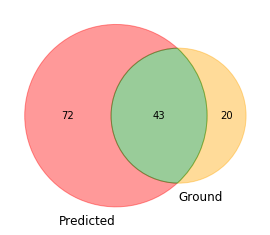

In [914]:
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
# venn2((set(orig), ground))
# orig
#res1[((res1.matches > th_m) & (res1.score > th_s))].groupby(["query", "reference"])["total"].max()


x  = res1[((res1.matches > th_m) & (res1.score > th_s))]
x = x.reset_index()

# x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
# orig = x.reference


venn2((set(orig), ground))
orig
x


In [915]:
set(orig).intersection(ground)

{'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Acetylgalactosamine_5TMS isomer 2',
 'Acetylglucosamine_5TMS isomer 1',
 'Allose_5TMS isomer 1',
 'Allose_5TMS isomer 2',
 'Arabitol_5TMS',
 'Arginine_3TMS',
 'Asparagine_3TMS',
 'Asparagine_4TMS isomer 2',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Creatinine_3TMS',
 'Fructose_5TMS isomer 1',
 'Fructose_5TMS isomer 2',
 'Glucose_5TMS isomer 1',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Glycine_3TMS',
 'Histidine_3TMS',
 'Lysine_3TMS',
 'Lysine_4TMS',
 'Maltotriose_11TMS isomer 1',
 'Maltotriose_11TMS isomer 2',
 'Mannitol_6TMS',
 'Mannose_5TMS isomer 1',
 'Mannose_5TMS isomer 2',
 'Myo-inositol_6TMS',
 'Palmitic acid_1TMS',
 'Phenylalanine_2TMS',
 'Ribitol_5TMS',
 'Ribose_4TMS',
 'Serine_3TMS',
 'Sorbitol_6TMS',
 'Spermidine_5TMS',
 'Spermine_6TMS',
 'Stearic acid_1TMS',
 'Threonic acid_4TMS',
 'Threonine_3TMS spectra 1',
 'Threonine_3TMS spectra 2',
 'Tyrosine_3TMS',
 'gamma-

In [894]:
set(orig).difference(ground)

{'Norvaline_2TMS', 'Uridine_4TMS isomer 1'}

,query,reference,matches,score,total
0,C01,6-Aminocaproic acid_3TMS,4,0.539212,0.539212
1,C01,Acetyllysine_3TMS,5,0.577784,0.577784
2,C01,Acetyllysine_4TMS,12,0.542551,0.542551
3,C01,Dopamine_4TMS,4,0.544244,0.544244
4,C01,Glutamic acid_2TMS,5,0.537401,0.537401
...,...,...,...,...,...
70,C46,Isoleucine_2TMS,4,0.913326,0.913326
71,C46,Leucine_2TMS,4,0.958918,0.958918
72,C46,Norleucine_2TMS,4,0.938633,0.938633
73,C56,Norvaline_2TMS,4,0.927351,0.927351


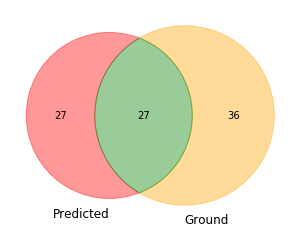

In [912]:
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference
x  = res2[((res2.matches > th_m) & (res2.score > th_s))]
x = x.reset_index()

# x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
# new = x.reference


venn2((set(new), ground))
x

In [896]:
set(new).intersection(ground)

{'Acetylgalactosamine_5TMS isomer 1',
 'Asparagine_3TMS',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Fructose_5TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Histidine_3TMS',
 'Leucine_2TMS',
 'Lysine_4TMS',
 'Myo-inositol_6TMS',
 'Palmitic acid_1TMS',
 'Phenylalanine_2TMS',
 'Serine_3TMS',
 'Stearic acid_1TMS',
 'Threonine_3TMS spectra 1'}

In [897]:
orig = np.zeros(shape=(20, 20))
new = orig.copy()

stat_orig = np.ones(63) * (100)
stat_new = stat_orig.copy()
for i, n_m in enumerate(range(1,21)):
    for j, n_s in enumerate(np.arange(0,1,0.05)):
        for res, grid, stat in zip([res1, res2], [orig, new], [stat_orig, stat_new]):
            p = set(res[((res.matches > n_m) & (res.score > n_s))].reference)
            
            x  = res[((res.matches > n_m) & (res.score > n_s))]
            x = x.reset_index()

            x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
            p = set(x.reference)
            
            TP = len(p.intersection(ground))
            FP = len(p.difference(ground))
            FN = len(ground.difference(p))
            stat[TP] = min(FP, stat[TP])
            grid[i,j] = TP/(TP + 0.5*(FN+FP)) if (TP + 0.5*(FN+FP)) != 0 else 0
stat_orig[stat_orig == 100] = np.nan
stat_new[stat_new == 100] = np.nan

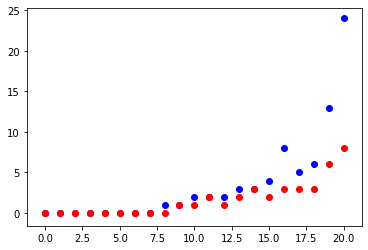

In [901]:
plt.scatter(x=np.arange(63), y=stat_orig, color="blue")
plt.scatter(x=np.arange(63), y=stat_new, color = "red")

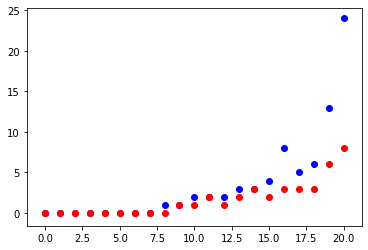

In [902]:
plt.scatter(x=np.arange(63), y=stat_orig, color="blue")
plt.scatter(x=np.arange(63), y=stat_new, color = "red")

In [903]:
stat_orig - stat_new

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  2.,  5.,  2.,  3.,  7., 16., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

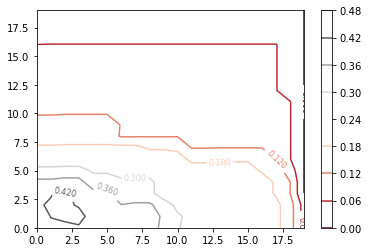

In [904]:
c = plt.contour(new, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()

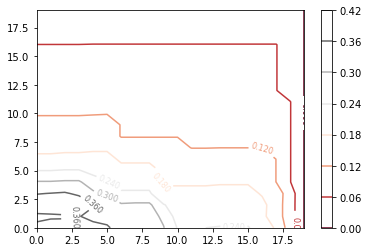

In [905]:
c = plt.contour(orig, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()


In [830]:
new.sum()

55.77760834190282

In [831]:
orig.sum()

50.495491242887

In [751]:
th_m, th_s = 5, 0.4
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference


In [752]:
set(orig) -set(new)

set()

In [753]:
set(new) -set(orig)

{'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Aspartic acid_3TMS isomer',
 'Glutamic acid_3TMS spectra 1',
 'Glutamic acid_3TMS spectra 2',
 'Glycylvaline_4TMS',
 'Palmitic acid_1TMS'}

In [754]:
set(new) - ground

{'2-Deoxyglucose_4TMS',
 'Acetyllysine_4TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Glucuro-3,6-lactone_3TMS isomer 1',
 'Glutamic acid_3TMS spectra 1',
 'Glycylvaline_4TMS',
 'Isocitric acid_4TMS',
 'Spermine_derivative',
 'Uridine_4TMS isomer 1',
 'Uridine_4TMS isomer 2',
 'Xylose_4TMS'}

In [755]:
set(orig) - ground

{'2-Deoxyglucose_4TMS',
 'Acetyllysine_4TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Glucuro-3,6-lactone_3TMS isomer 1',
 'Isocitric acid_4TMS',
 'Spermine_derivative',
 'Uridine_4TMS isomer 1',
 'Uridine_4TMS isomer 2',
 'Xylose_4TMS'}